In [28]:
%matplotlib inline
import matplotlib
import pandas as pd
import quandl #to get stock data
import numpy as np
import datetime
import warnings; warnings.simplefilter('ignore') #ignoring constant warnings in Jupyter Notebook
import matplotlib.pyplot as plt #to graph predicitons

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm 

#creating a dataframe holding stock from company of choice in format "WIKI/companyticker", here we use Chipotle, Inc., where the ticker is CMG

df = quandl.get("WIKI/CMG")

#looking at the head of the whole dataframe
print(df.head())


             Open   High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                           
2006-01-26  45.00  48.28  39.51  44.00  13218600.0          0.0          1.0   
2006-01-27  44.88  44.90  41.75  42.20   1150800.0          0.0          1.0   
2006-01-30  42.20  45.51  41.25  44.80    735800.0          0.0          1.0   
2006-01-31  45.50  49.30  45.38  47.52   1111200.0          0.0          1.0   
2006-02-01  48.90  49.24  45.25  46.56    606700.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
2006-01-26      45.00      48.28     39.51       44.00   13218600.0  
2006-01-27      44.88      44.90     41.75       42.20    1150800.0  
2006-01-30      42.20      45.51     41.25       44.80     735800.0  
2006-01-31      45.50      49.30     45.38       47.52    1111200.0  
2006-02-01      48.

In [6]:
#isolating the Adj. Close column we will use in our predictions 
df = df[['Adj. Close']]

#forecasting 30 days into the future 
forecast = int(30)
#label column with data shifted 30 units
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

#seeing the head of the dataframe to be used for prediction
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-02-13      251.33         NaN
2018-02-14      289.91         NaN
2018-02-15      286.65         NaN
2018-02-16      305.63         NaN
2018-02-20      317.57         NaN


In [13]:
#X variable will be an array of the Adj. Close values, need to get rid of prediction column
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:] #setting X_forecast equal to last 30 
X = X[:-forecast] #remove last 30 from X

y = np.array(df['Prediction']) #result of interest, array holding just the prediction values
y = y[:-forecast] #Clearing out the last 30 from Y


In [29]:
#Linear Regression
#Starting the training process, test size will be 20% of data

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

#initiate linear regression model and fit with training data
#training
clf = LinearRegression() #creating model stored in clf variable
clf.fit(X_train, y_train) #fitting the model with the training data

#testing 
confidence = clf.score(X_test, y_test) 
print("confidence: ", confidence)

#predicting our X_forecast values
forecast_prediction = clf.predict(X_forecast) #calling the model to predict the X_forecast variable and storing into variable forecast_prediction
print(forecast_prediction)

confidence:  0.963164623618
[ 320.03321452  320.9070834   323.26652936  326.85910141  328.64567778
  328.67480675  335.72401568  338.5398154   344.69573615  331.2284458
  329.97590041  330.77209205  335.08317851  331.45176784  333.49079522
  323.53839968  326.140587    316.3920942   313.40152071  302.39077286
  306.3037635   275.11635425  269.09636866  258.85268349  257.87200842
  254.84259631  292.30244216  289.1370949   307.56601854  319.15934564]


Text(0.5,1,'Chipotle(CMG) Price Predictions, Next 30 Days')

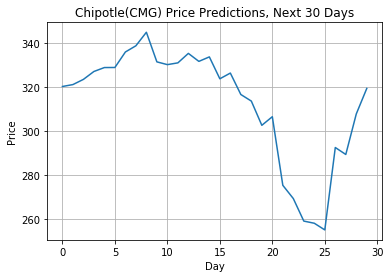

In [27]:
#graphing our predictions 
plt.plot(forecast_prediction)
plt.xlabel('Day')
plt.ylabel('Price')
plt.grid(True)
plt.title('Chipotle(CMG) Price Predictions, Next 30 Days')
